In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import pylab
import scipy.stats as stats
sns.set()

In [18]:
df = pd.read_csv('Car_Purchasing_Data.csv')

In [19]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [20]:
df.shape

(500, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [22]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


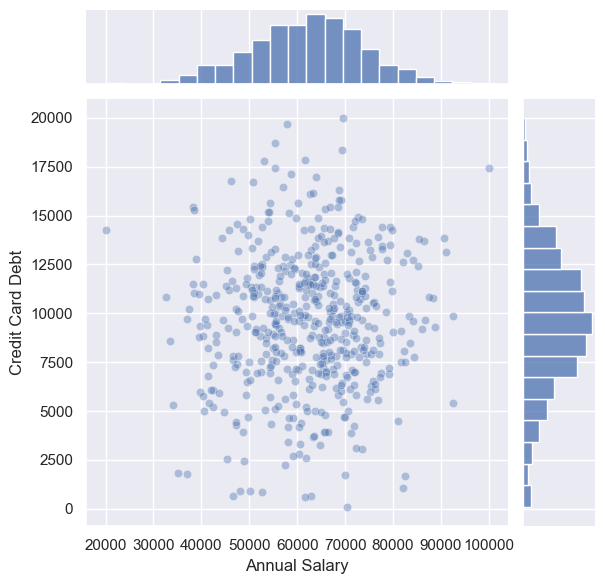

In [25]:
sns.jointplot(data = df, x = 'Annual Salary', y = 'Credit Card Debt', alpha = 0.4)

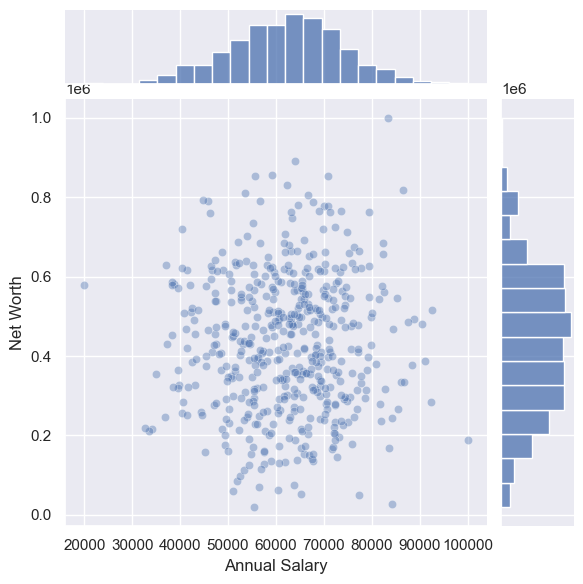

In [26]:
sns.jointplot(data = df, x = 'Annual Salary', y = 'Net Worth', alpha = 0.4)

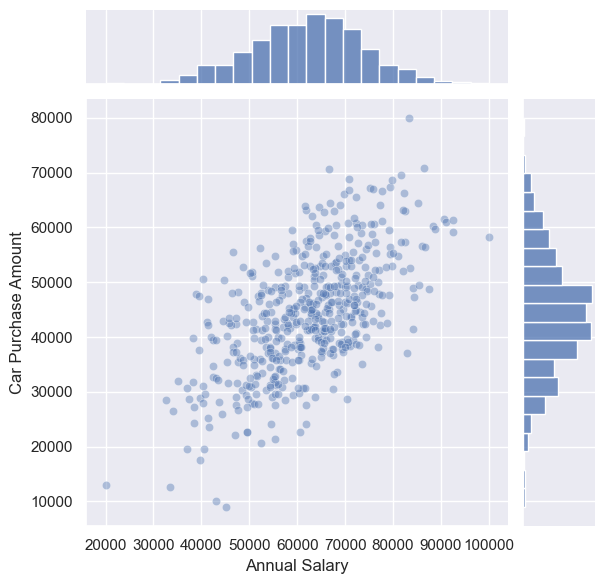

In [27]:
sns.jointplot(data = df, x ='Annual Salary', y = 'Car Purchase Amount', alpha = 0.4)

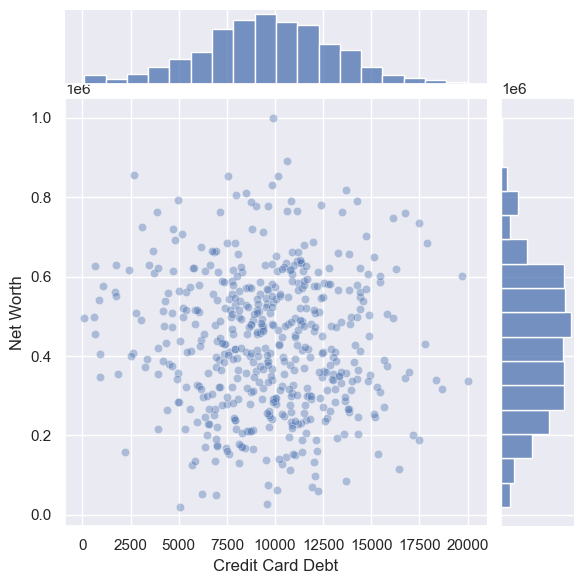

In [28]:
sns.jointplot(data = df, x = 'Credit Card Debt', y = 'Net Worth', alpha = 0.4)

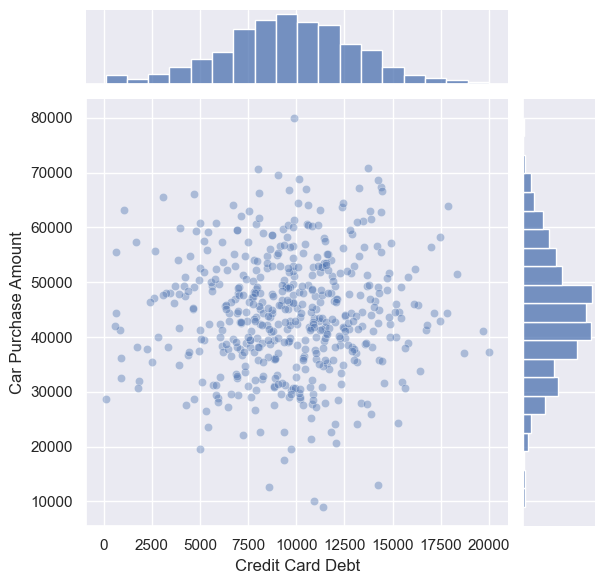

In [29]:
sns.jointplot(data = df, x = 'Credit Card Debt', y = 'Car Purchase Amount', alpha = 0.4)

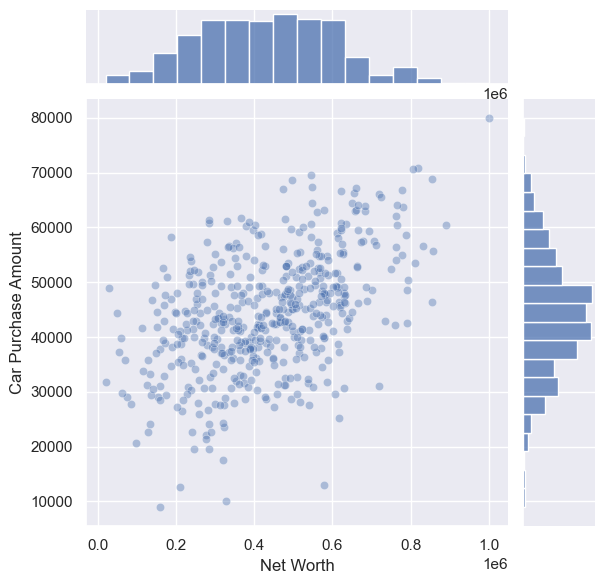

In [30]:
sns.jointplot(data = df, x = 'Net Worth', y = 'Car Purchase Amount', alpha = 0.4)

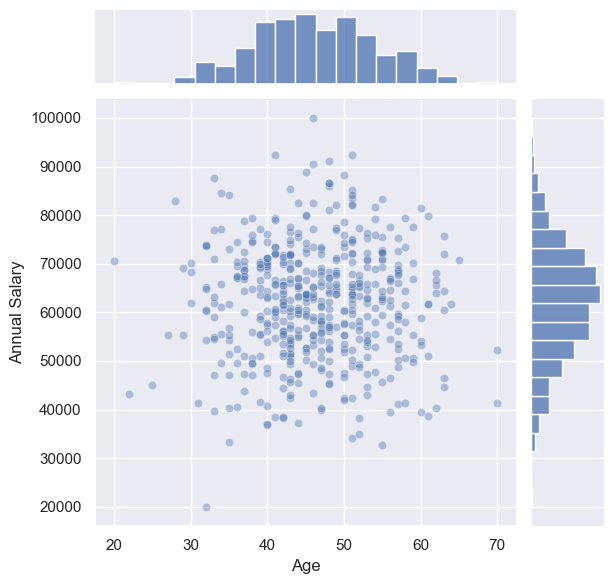

In [31]:
sns.jointplot(data = df, x = 'Age', y = 'Annual Salary', alpha = 0.4)

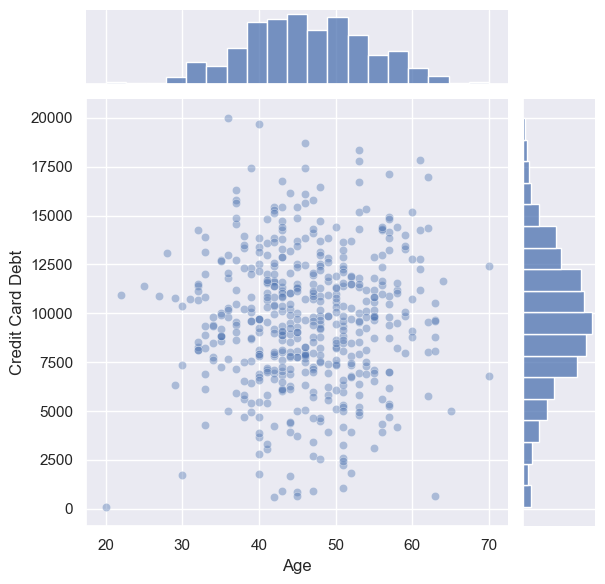

In [32]:
sns.jointplot(data = df, x = 'Age', y = 'Credit Card Debt', alpha = 0.4)

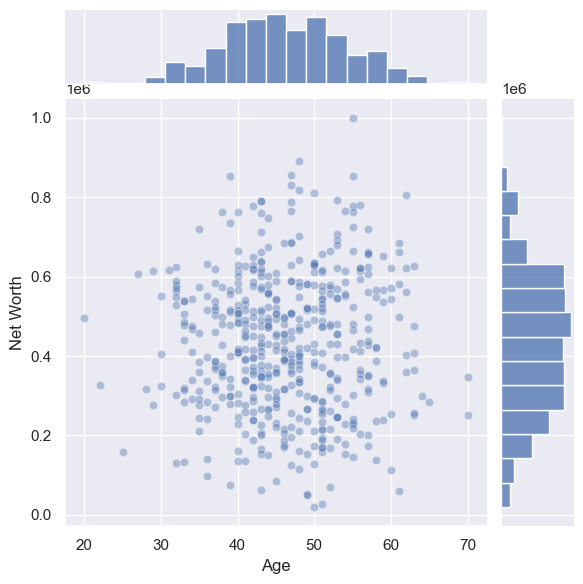

In [33]:
sns.jointplot(data = df, x = 'Age', y = 'Net Worth', alpha = 0.4)

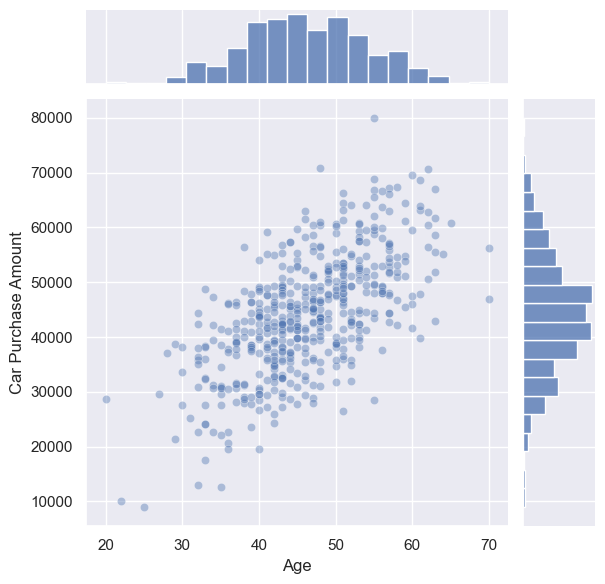

In [34]:
sns.jointplot(data = df, x = 'Age', y = 'Car Purchase Amount', alpha = 0.4)

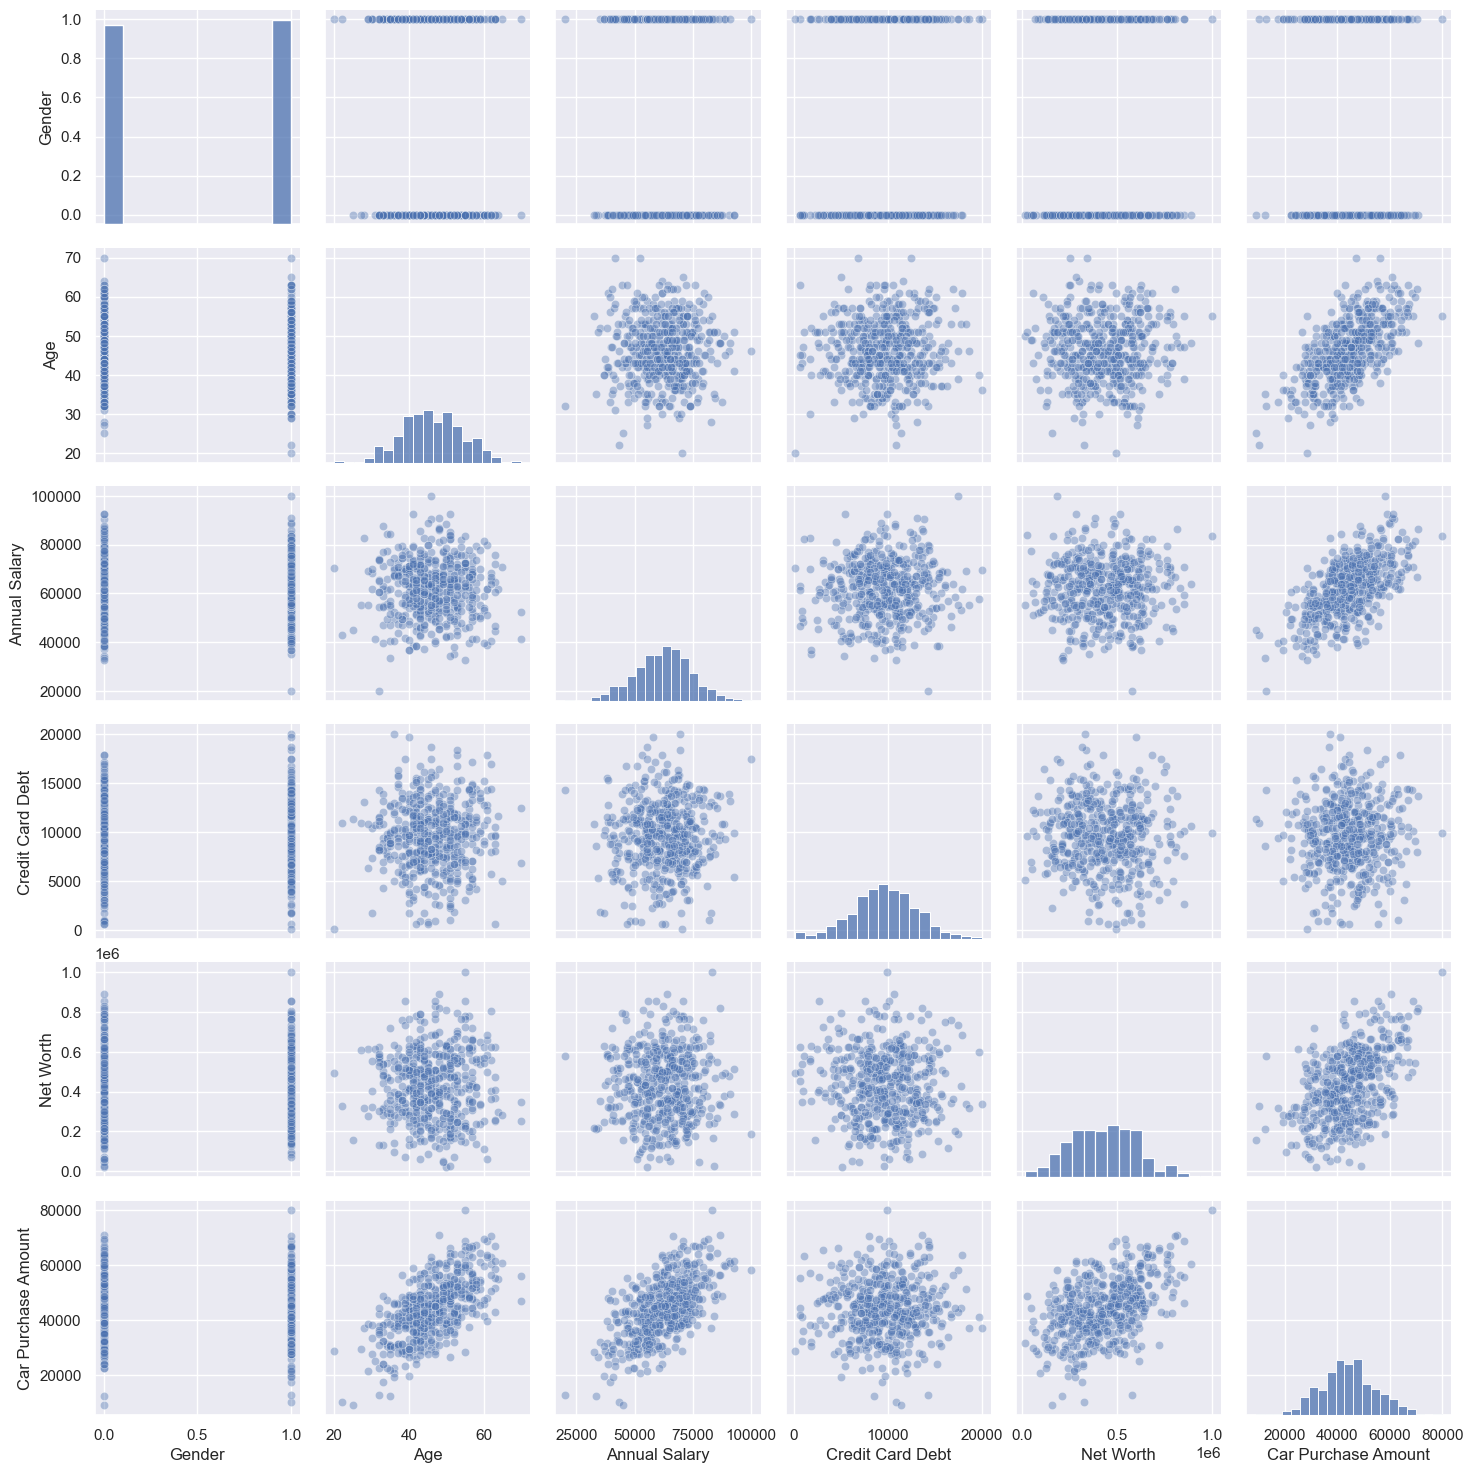

In [35]:
sns.pairplot(data = df, kind = 'scatter', plot_kws = {'alpha': 0.4})

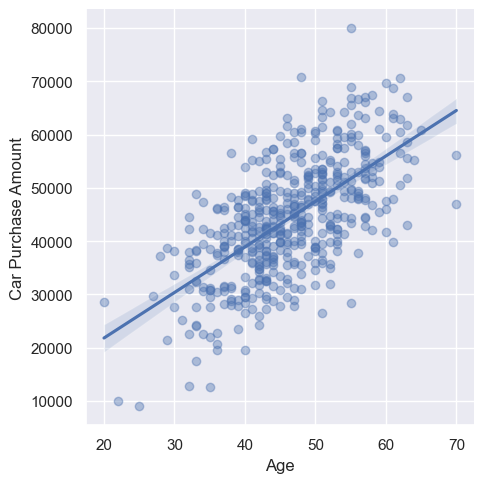

In [36]:
sns.lmplot(data = df, x = 'Age', y = 'Car Purchase Amount', scatter_kws = {'alpha': 0.4})

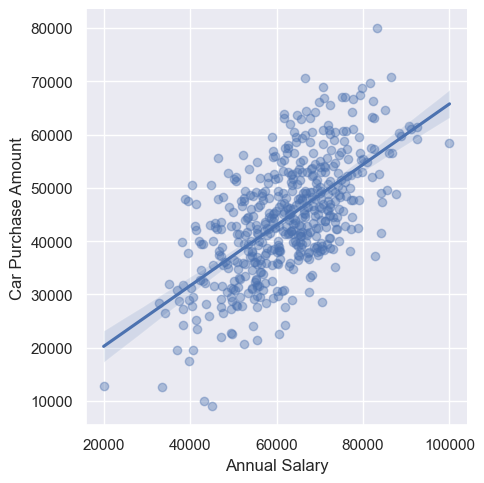

In [37]:
sns.lmplot(data = df, x = 'Annual Salary', y = 'Car Purchase Amount', scatter_kws = {'alpha': 0.4})

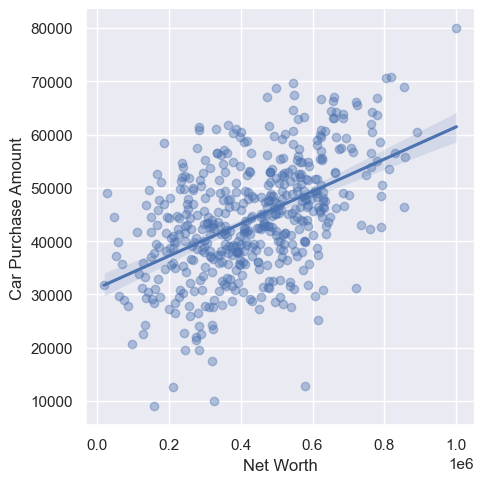

In [38]:
sns.lmplot(data = df, x = 'Net Worth', y = 'Car Purchase Amount', scatter_kws = {'alpha': 0.4})

In [39]:
X = df[['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']]
y = df['Car Purchase Amount']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True)

In [42]:
print('The size of training set is:', X_train.shape[0])
print('The size of test set is:', X_test.shape[0])

The size of training set is: 400
The size of test set is: 100


In [44]:
scaler = StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)

In [46]:
X_test_scaled = scaler.transform(X_test)

In [49]:
lr = LinearRegression()

In [52]:
cvs = cross_val_score(lr, X_train_scaled, y_train, cv = 5)
print('The validation accuracy of the linear regression model is:', cvs.mean())

The validation accuracy of the linear regression model is: 0.9994637069616354


In [53]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [54]:
pred = lr.predict(X_test_scaled)

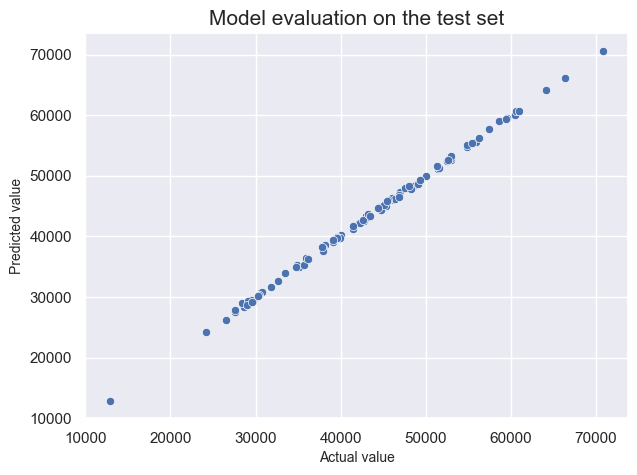

In [57]:
plt.figure(figsize = (7, 5))
sns.scatterplot(x = y_test, y = pred)
plt.title('Model evaluation on the test set', fontsize = 15)
plt.xlabel('Actual value', fontsize = 10)
plt.ylabel('Predicted value', fontsize = 10)
plt.show()

In [59]:
lr.coef_

array([6686.42793974, 6354.18230643,   16.9386881 , 4978.62847844])

In [60]:
cdf = pd.DataFrame(X.columns)
cdf

,0
0,Age
1,Annual Salary
2,Credit Card Debt
3,Net Worth


In [61]:
cdf['Coef'] = lr.coef_

In [63]:
cdf.rename({0: 'Column'}, axis = 1, inplace = True)

In [64]:
cdf

,Column,Coef
0,Age,6686.427940
1,Annual Salary,6354.182306
2,Credit Card Debt,16.938688
3,Net Worth,4978.628478


In [65]:
print('Mean Absolute Error is:', mean_absolute_error(y_test, pred))
print('Mean Squared Error is:', mean_squared_error(y_test, pred))
print('RMSE is:', math.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error is: 211.08699623058368
Mean Squared Error is: 63553.537977519554
RMSE is: 252.0982704770494


In [66]:
residuals = y_test - pred

C:\Users\loptop\AppData\Local\Temp\ipykernel_2472\3261525254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins = 30, kde = True)


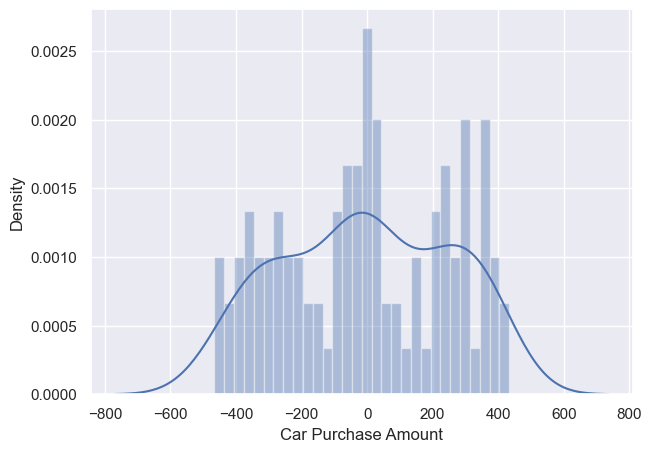

In [67]:
plt.figure(figsize = (7, 5))
sns.distplot(residuals, bins = 30, kde = True)
plt.show()

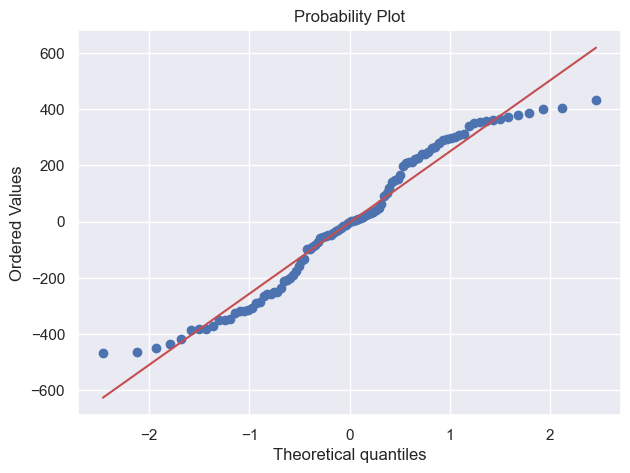

In [70]:
plt.figure(figsize = (7, 5))
stats.probplot(residuals, dist = 'norm', plot = pylab)
plt.show()